Classification of Car Fuel Efficiency

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV





In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CarEconomy/Dataset/fuel-econ.csv')

In [ ]:
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         3929 non-null   int64  
 1   make       3929 non-null   object 
 2   model      3929 non-null   object 
 3   year       3929 non-null   int64  
 4   VClass     3929 non-null   object 
 5   drive      3929 non-null   object 
 6   trans      3929 non-null   object 
 7   fuelType   3929 non-null   object 
 8   cylinders  3929 non-null   int64  
 9   displ      3929 non-null   float64
 10  pv2        3929 non-null   int64  
 11  pv4        3929 non-null   int64  
 12  city       3929 non-null   float64
 13  UCity      3929 non-null   float64
 14  highway    3929 non-null   float64
 15  UHighway   3929 non-null   float64
 16  comb       3929 non-null   float64
 17  co2        3929 non-null   int64  
 18  feScore    3929 non-null   int64  
 19  ghgScore   3929 non-null   int64  
dtypes: float

In [ ]:
(df.isnull().sum())


,0
id,0
make,0
model,0
year,0
VClass,0
drive,0
trans,0
fuelType,0
cylinders,0
displ,0


In [ ]:
print("Number of Duplicate Rows:", df.duplicated().sum())

Number of Duplicate Rows: 0


In [ ]:
print("Dataset Shape:", df.shape)



Dataset Shape: (3929, 20)


In [ ]:
print("Rows with missing values:", df.isnull().any(axis=1).sum())

Rows with missing values: 0


In [ ]:
# Visualize the distribution of numerical variables
numerical_columns = ['displ', 'fuelType', 'city', 'highway']

In [ ]:
print(df.columns)

Index(['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType',
       'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway',
       'UHighway', 'comb', 'co2', 'feScore', 'ghgScore'],
      dtype='object')


In [ ]:
df.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


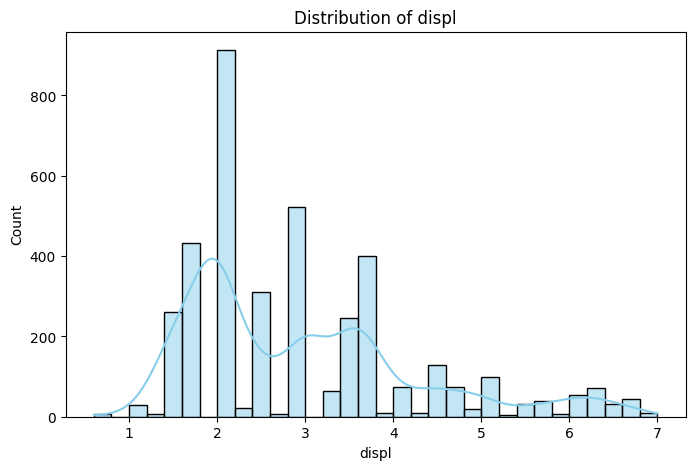

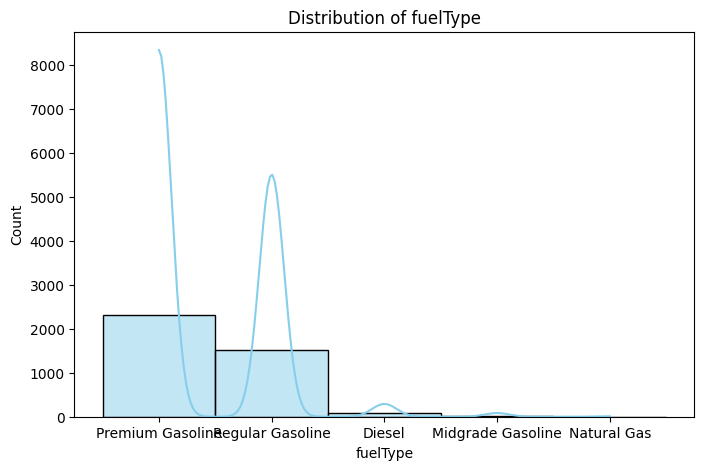

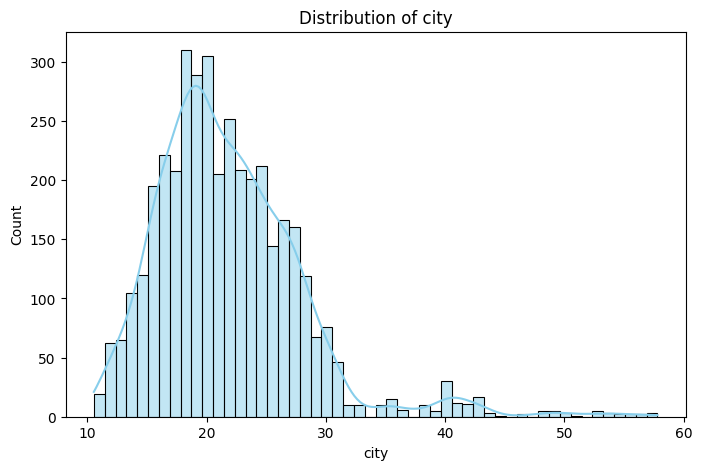

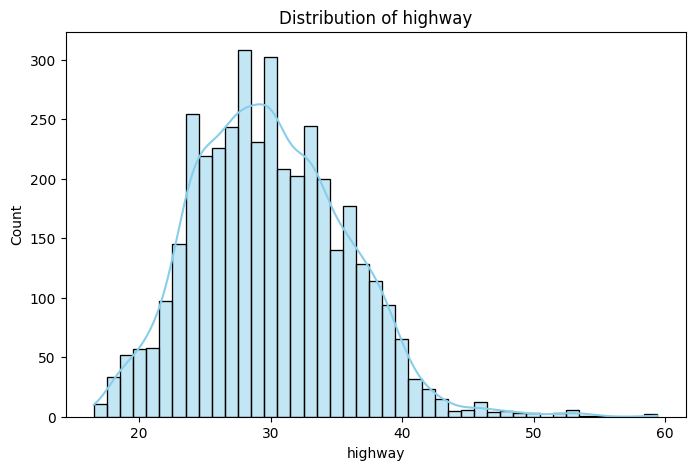

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.show()

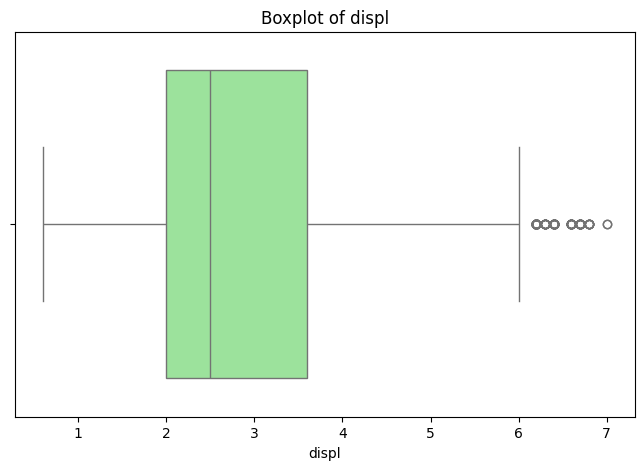

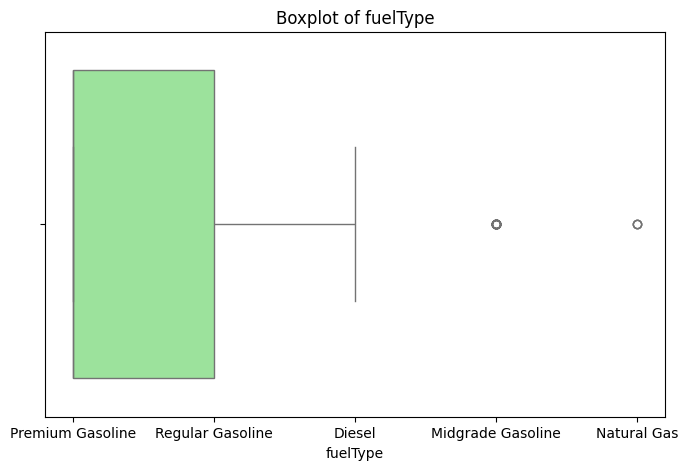

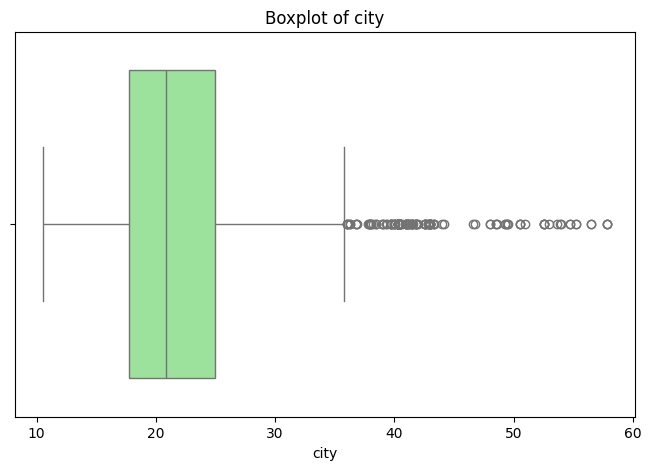

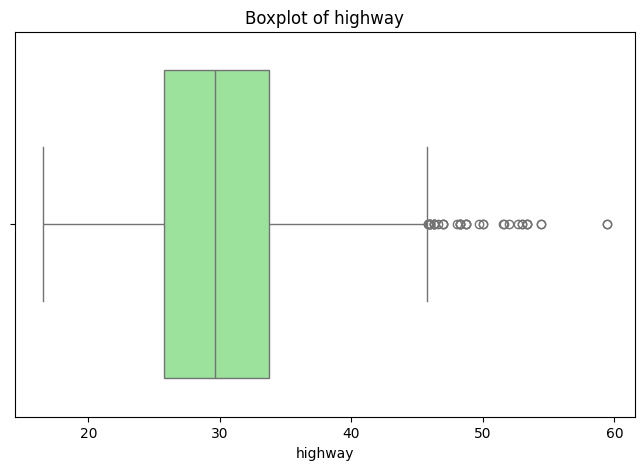

In [ ]:
# Boxplots to identify outliers
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
categorical_columns = ['drive', 'fuelType', 'VClass']


<ipython-input-17-d72b2c882312>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1')


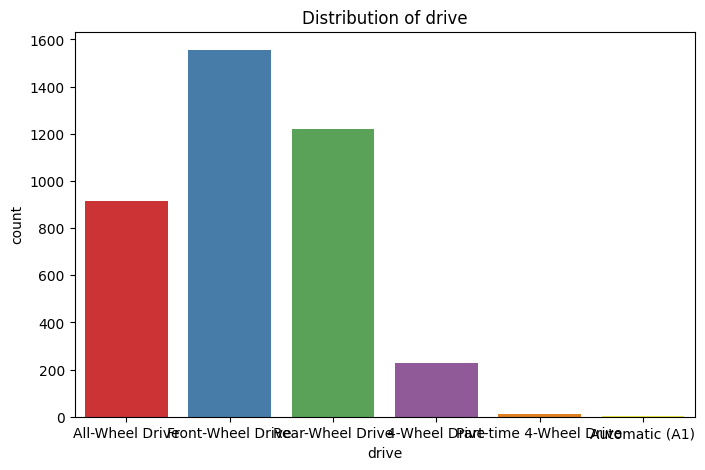

<ipython-input-17-d72b2c882312>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1')


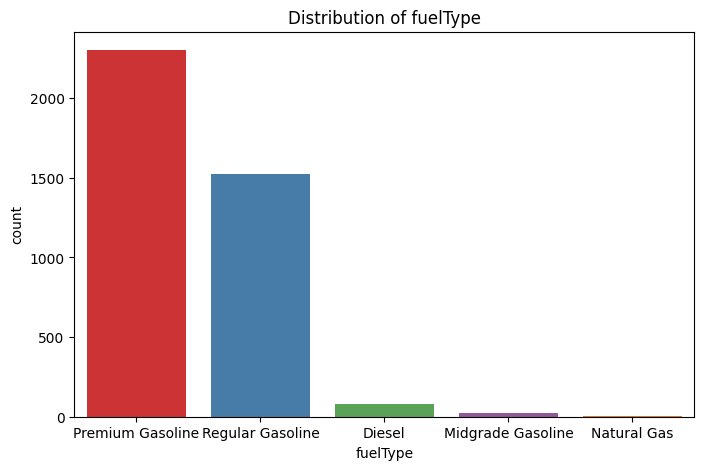

<ipython-input-17-d72b2c882312>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set1')


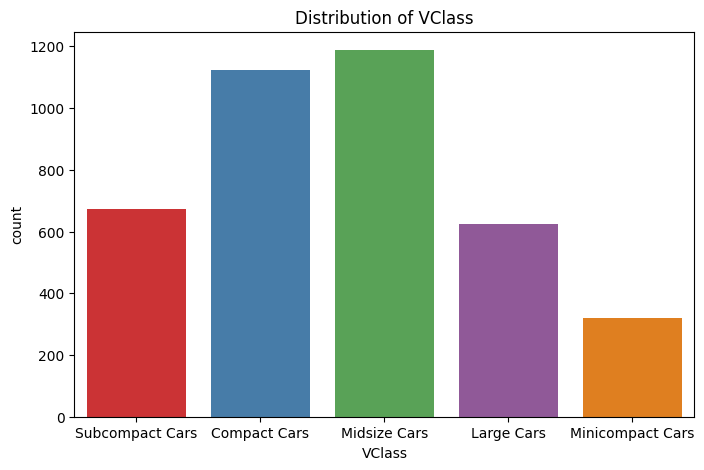

In [ ]:
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette='Set1')
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
# Identify and print any bivariate columns
bivariate_cols = [x for x in df.columns if len(df[x].unique()) == 2]
print("Bivariate Columns:", bivariate_cols)




Bivariate Columns: []


In [ ]:
#list of univariate columns

univariate_cols = [x for x in df.columns if x not in bivariate_cols]
univariate_cols

['id',
 'make',
 'model',
 'year',
 'VClass',
 'drive',
 'trans',
 'fuelType',
 'cylinders',
 'displ',
 'pv2',
 'pv4',
 'city',
 'UCity',
 'highway',
 'UHighway',
 'comb',
 'co2',
 'feScore',
 'ghgScore']

Data Cleaning and Preprocessing

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the categorical columns
df['make'] = label_encoder.fit_transform(df['make'])
df['model'] = label_encoder.fit_transform(df['model'])
df['fuelType'] = label_encoder.fit_transform(df['fuelType'])
df['trans'] = label_encoder.fit_transform(df['trans'])
df['drive'] = label_encoder.fit_transform(df['drive'])
df['VClass'] = label_encoder.fit_transform(df['VClass'])

df = df.drop(columns=['id'])

# Check the transformed data
print(df.head())



   make  model  year  VClass  drive  trans  ...  highway  UHighway     comb  co2  feScore  ghgScore
0    29    424  2013       4      1      4  ...  22.5568   30.1798  18.7389  471        4         4
1    37    235  2013       0      3      1  ...  31.0367   42.4936  25.2227  349        6         6
2    37    235  2013       0      3     13  ...  26.5716   35.1000  20.6716  429        5         5
3    37    236  2013       0      1     13  ...  25.2190   33.5000  19.8774  446        5         5
4     8    541  2013       2      3     13  ...  35.5340   51.8816  28.6813  310        8         8

[5 rows x 19 columns]


In [ ]:
# List of numerical columns to scale
numeric_columns = ['cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway', 'UHighway', 'comb', 'co2', 'ghgScore']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the numeric columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Check the scaled data
print(df[numeric_columns].head())


   cylinders     displ       pv2       pv4      city     UCity   highway  \
0   0.283102  0.650536  1.467096 -1.217378 -0.859960 -0.852430 -1.290630   
1  -0.781816 -0.727998  1.864762 -1.217378  0.006427 -0.117434  0.184947   
2   0.283102  0.497365  1.864762 -1.217378 -0.694416 -0.753245 -0.592020   
3   0.283102  0.497365  1.864762 -1.217378 -0.782800 -0.830286 -0.827384   
4  -0.781816 -0.421657 -0.627278  0.734890  0.471083  0.433147  0.967516   

   UHighway      comb       co2  ghgScore  
0 -1.392475 -1.008323  1.022838 -0.945755  
1 -0.039200  0.071864 -0.298550  0.194258  
2 -0.851750 -0.686339  0.567934 -0.375749  
3 -1.027588 -0.818651  0.752062 -0.375749  
4  0.992531  0.648059 -0.720961  1.334271  


In [ ]:
X = df.drop('VClass', axis=1)  # Drop the target column
y = df['VClass']  # VClass is the target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (3143, 18)
Test set size: (786, 18)


Random Forest

In [ ]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Train the model

NameError: name 'X_train' is not defined

In [ ]:
# Train Support Vector Classifier (SVC)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)  # Train the model

NameError: name 'X_train' is not defined

In [ ]:
# Random Forest - Predictions and Evaluation
rf_train_pred = rf_model.predict(X_train)
print("Random Forest - Training Set Performance:")
print("Accuracy:", accuracy_score(y_train, rf_train_pred))
print("Classification Report:\n", classification_report(y_train, rf_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, rf_train_pred))

Random Forest - Training Set Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       902
           1       1.00      1.00      1.00       510
           2       1.00      1.00      1.00       937
           3       1.00      1.00      1.00       260
           4       1.00      1.00      1.00       534

    accuracy                           1.00      3143
   macro avg       1.00      1.00      1.00      3143
weighted avg       1.00      1.00      1.00      3143

Confusion Matrix:
 [[902   0   0   0   0]
 [  0 510   0   0   0]
 [  0   0 937   0   0]
 [  0   0   0 260   0]
 [  0   0   0   0 534]]


In [ ]:
svm_train_pred = svm_model.predict(X_train)
print("\nSVM - Training Set Performance:")
print("Accuracy:", accuracy_score(y_train, svm_train_pred))
print("Classification Report:\n", classification_report(y_train, svm_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, svm_train_pred))



SVM - Training Set Performance:
Accuracy: 0.5657015590200446
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.54      0.51       902
           1       0.59      0.60      0.59       510
           2       0.55      0.47      0.51       937
           3       0.72      0.64      0.68       260
           4       0.68      0.70      0.69       534

    accuracy                           0.57      3143
   macro avg       0.60      0.59      0.59      3143
weighted avg       0.57      0.57      0.57      3143

Confusion Matrix:
 [[489  57 241  29  86]
 [101 307  99   0   3]
 [310 153 443   1  30]
 [ 36   0   0 166  58]
 [ 98   6  22  35 373]]


Random Forest - Training Set Performance:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       902
           1       1.00      1.00      1.00       510
           2       1.00      1.00      1.00       937
           3       1.00      1.00      1.00       260
           4       1.00      1.00      1.00       534

    accuracy                           1.00      3143
   macro avg       1.00      1.00      1.00      3143
weighted avg       1.00      1.00      1.00      3143

Confusion Matrix:
 [[902   0   0   0   0]
 [  0 510   0   0   0]
 [  0   0 937   0   0]
 [  0   0   0 260   0]
 [  0   0   0   0 534]]


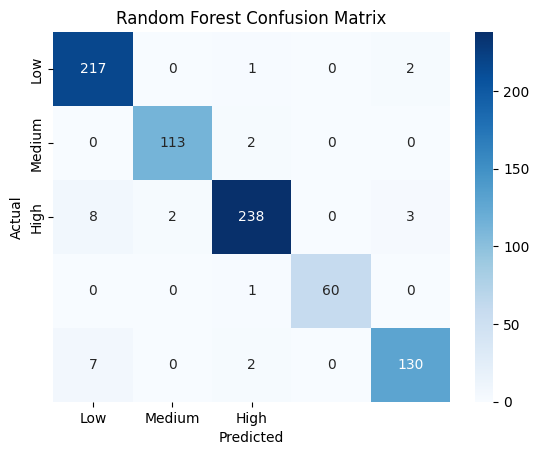

In [ ]:

# Random Forest - Predictions and Evaluation
rf_train_pred = rf_model.predict(X_train)
print("Random Forest - Training Set Performance:")
print("Accuracy:", accuracy_score(y_train, rf_train_pred))
print("Classification Report:\n", classification_report(y_train, rf_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, rf_train_pred))

# Predict on the test set
rf_test_pred = rf_model.predict(X_test) #This line is added to calculate the rf_test_pred

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


SVM - Training Set Performance:
Accuracy: 0.5657015590200446
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.54      0.51       902
           1       0.59      0.60      0.59       510
           2       0.55      0.47      0.51       937
           3       0.72      0.64      0.68       260
           4       0.68      0.70      0.69       534

    accuracy                           0.57      3143
   macro avg       0.60      0.59      0.59      3143
weighted avg       0.57      0.57      0.57      3143

Confusion Matrix:
 [[489  57 241  29  86]
 [101 307  99   0   3]
 [310 153 443   1  30]
 [ 36   0   0 166  58]
 [ 98   6  22  35 373]]


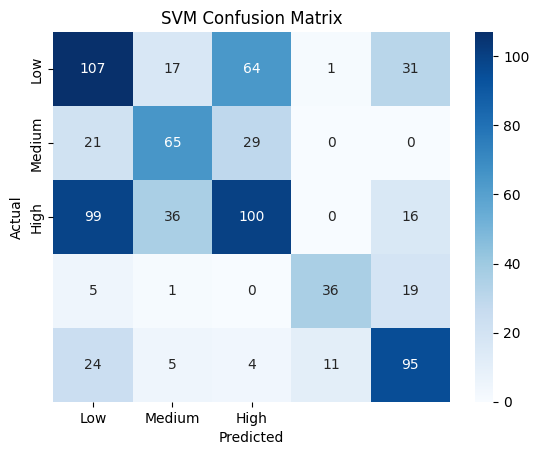

In [ ]:
# Train Support Vector Classifier (SVC)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)  # Train the model


# SVM - Predictions and Evaluation
svm_train_pred = svm_model.predict(X_train)
print("\nSVM - Training Set Performance:")
print("Accuracy:", accuracy_score(y_train, svm_train_pred))
print("Classification Report:\n", classification_report(y_train, svm_train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, svm_train_pred))

# Predict on the test set for SVM
svm_test_pred = svm_model.predict(X_test)  # This line is added to calculate svm_test_pred

# SVM Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_test_pred)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Define the model
rfc = RandomForestClassifier()

from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rfc, X_train, y_train, cv=5)

# Print the average cross-validation score
print("Average Cross-Validation Score:", cv_scores.mean())

Average Cross-Validation Score: 0.9720023695482668


In [ ]:
# Define the model
svm = SVC()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)

from sklearn.model_selection import cross_val_score

# Print the average cross-validation score
print("Average Cross-Validation Score:", cv_scores.mean())

Average Cross-Validation Score: 0.33343797150466314
